# Initial Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install pytorch

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

#Cleaning and Shuffling the Data

In [ ]:
import json

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Movies_and_TV.json'

def create_balanced_data(data_path=DATA_PATH, num_samples_from_each_category = 400000):
    count_data = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    f_read = open(data_path, "r")
    f_write = open("/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Not_Clean.json", 'w')
    for line in f_read:
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            if count_data[int(review_json['overall'])] >= num_samples_from_each_category:
                continue
            else:
                count_data[int(review_json['overall'])] += 1
                review_dict = {'reviewText': review_json['reviewText'], 'overall': review_json['overall']}
                reviews_as_dicts.append(review_dict)
                review_json = json.dumps(review_dict)
                f_write.write(review_json + "\n")
    print(count_data)
    f_read.close()
    f_write.close()

create_balanced_data()

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Not_Clean.json"

{1: 400000, 2: 400000, 3: 400000, 4: 400000, 5: 400000}


#Loading The Data

#Clean The Data


In [ ]:
import json
import nltk
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words('english'))

def clean_review(review):
  review_text = html.unescape(review)
  review_text = re.sub(r"<.*?>", ' ', review_text)
  review_text = re.sub(r"\&\#[0-9]+\;", '', review_text)
  review_text = re.sub(r"[`'\"-/,.!?()><=]", " ", review_text)
  review_text = review_text.lower()
  review_text = word_tokenize(review_text)
  tokens_without_sw = [word for word in review_text if not word in stopwords]
  text_clean = ""
  for word in tokens_without_sw:
      text_clean += word + " "
  return text_clean[:-1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import json

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Not_Clean.json"

def create_balanced_data(data_path=DATA_PATH, num_samples_from_each_category = 400000):
    count_data = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    f_read = open(data_path, "r")
    f_write = open("/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean.json", 'w')
    # data = []
    for line in f_read:
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            if count_data[int(review_json['overall'])] >= num_samples_from_each_category:
                continue
            else:
                count_data[int(review_json['overall'])] += 1
                review_dict = {'reviewText': clean_review(review_json['reviewText']), 'overall': review_json['overall']}
                review_json = json.dumps(review_dict)
                f_write.write(review_json + "\n")
    print(count_data)
    f_read.close()
    f_write.close()

create_balanced_data()


{1: 400000, 2: 400000, 3: 400000, 4: 400000, 5: 400000}


In [ ]:
import json
import nltk
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words('english'))

def clean_review(review):
  review_text = html.unescape(review)
  review_text = re.sub(r"<.*?>", ' ', review_text)
  review_text = re.sub(r"\&\#[0-9]+\;", '', review_text)
  review_text = re.sub(r"[`'\"-/,.!?()><=]", " ", review_text)
  review_text = review_text.lower()
  review_text = word_tokenize(review_text)
  return ' '.join(review_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import json

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Not_Clean.json"

def create_balanced_data(data_path=DATA_PATH, num_samples_from_each_category = 400000):
    count_data = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    f_read = open(data_path, "r")
    f_write = open("/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops.json", 'w')
    # data = []
    for line in f_read:
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            if count_data[int(review_json['overall'])] >= num_samples_from_each_category:
                continue
            else:
                count_data[int(review_json['overall'])] += 1
                review_dict = {'reviewText': clean_review(review_json['reviewText']), 'overall': review_json['overall']}
                review_json = json.dumps(review_dict)
                f_write.write(review_json + "\n")
    print(count_data)
    f_read.close()
    f_write.close()

create_balanced_data()

{1: 400000, 2: 400000, 3: 400000, 4: 400000, 5: 400000}


#Spliting to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean.json"
DATA_PATH_TRAIN = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_Train.json"
DATA_PATH_TEST = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_Test.json"


def create_balanced_data(data_path=DATA_PATH, num_samples_from_each_category=400000):
    count_data = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    f_read = open(data_path, "r")
    X = []
    Y = []
    for line in f_read:
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            if count_data[int(review_json['overall'])] >= num_samples_from_each_category:
                continue
            else:
                count_data[int(review_json['overall'])] += 1
                review_dict = {'reviewText': review_json['reviewText'], 'overall': review_json['overall']}
                Y.append(int(review_json['overall']))
                review_json = json.dumps(review_dict)
                X.append(review_json)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    f_read.close()

    f_write = open(DATA_PATH_TRAIN, 'w')
    for x in X_train:
        f_write.write(x + '\n')
    f_write.close()

    f_write = open(DATA_PATH_TEST, 'w')
    for x in X_test:
        f_write.write(x  + '\n')
    f_write.close()

create_balanced_data()

In [ ]:
from sklearn.model_selection import train_test_split

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops.json"
DATA_PATH_TRAIN = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Train.json"
DATA_PATH_TEST = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Test.json"


def create_balanced_data(data_path=DATA_PATH, num_samples_from_each_category=400000):
    count_data = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    f_read = open(data_path, "r")
    X = []
    Y = []
    for line in f_read:
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            if count_data[int(review_json['overall'])] >= num_samples_from_each_category:
                continue
            else:
                count_data[int(review_json['overall'])] += 1
                review_dict = {'reviewText': review_json['reviewText'], 'overall': review_json['overall']}
                Y.append(int(review_json['overall']))
                review_json = json.dumps(review_dict)
                X.append(review_json)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    f_read.close()

    f_write = open(DATA_PATH_TRAIN, 'w')
    for x in X_train:
        f_write.write(x + '\n')
    f_write.close()

    f_write = open(DATA_PATH_TEST, 'w')
    for x in X_test:
        f_write.write(x  + '\n')
    f_write.close()

create_balanced_data()

#Load Data After Cleanup

We now use a function that will take our data and split it into training and test data. We will create a vocabulary (word2idx) which consists of a mapping from every word to its corresponding index, and convert every review to a tokenized form. For example, "Hi Tal" -> [5,17]. The vocab will be created by the training data and then we will start working with a few objects:

X_train, X_test: Sentences for training and test data

Y_train, Y_test: Labels of value 0-4 depending on the rating of the review (rating 5 becomes 4 and 1 becomes 0)

We also create 2 dictionaries:

word2idx: A mapping from word to corresponding index in the vocab

idx2word: A mapping from index to the corresponding word

In [2]:
import json

DATA_PATH_TRAIN = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_Train.json"
DATA_PATH_TEST = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_Test.json"

def get_corpus_and_labels(data_path):
    f_read = open(data_path, "r")
    corpus = []
    labels = []
    for line in f_read:
        review_json = json.loads(line)
        if "reviewText" in review_json:
          corpus.append(review_json["reviewText"])
          labels.append(int(review_json['overall'])-1)
    f_read.close()
    return corpus, labels

X_train, Y_train = get_corpus_and_labels(DATA_PATH_TRAIN)
X_test, Y_test = get_corpus_and_labels(DATA_PATH_TEST)

print("Example of a training sample: ", X_train[1])
print("With label: ", Y_train[1]+1)

Example of a training sample:  perhaps greatest achievement cinematic art since chaplin city lights welles citizen kane one : clearly visible zippers monster costumes nonsensical plot heavy handed messaging terrible music cute kid want slap come one expecting 1954 japanese original even shin godzilla really good want camp sludgy buckets briefly serious transfer actually nice clear matters language menu work player docked disc star brought options movie playing could change language japanese add subtitles would except see worked part fun things like terrible dubbing speak japanese see might want japanese fair enough anyway seventies godzilla absurd prime godzilla movies good movies one know getting however hoot
With label:  4


#**BOW and N-GRAMS**

We now create the vocabulary and some additional information that will help us later:

unigram_counter - will hold a count of the appearance of each word in the training data

bigram_counter - will hold a count of the appearance of each couple of words in the training data

trigram_counter - will hold a count of the appearance of each triplets in the training data

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm

nltk.download('punkt')

unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

def remove_threshold(counter, threshold=3):
  for word in counter.copy().keys():
    if counter[word] < threshold:
      counter.pop(word)

def build_vocab_counters(reviews):
  for review_no, review in enumerate(tqdm(reviews)):
    if review_no == int(0.5*len(reviews)):
        remove_threshold(bigram_counter)
        remove_threshold(trigram_counter)
    tokenized_review = word_tokenize(review)
    for i in range(len(tokenized_review)):
      word = tokenized_review[i]
      unigram_counter[word] = unigram_counter.get(word,0) + 1
      if i <= len(tokenized_review) - 2:
        bi_gram = (tokenized_review[i], tokenized_review[i+1])
        bigram_counter[bi_gram] = bigram_counter.get(bi_gram,0) + 1
      if i <= len(tokenized_review) - 3:
        tri_gram = (tokenized_review[i], tokenized_review[i+1], tokenized_review[i+2])
        trigram_counter[tri_gram] = trigram_counter.get(tri_gram,0) + 1

build_vocab_counters(X_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


100%|██████████| 1600000/1600000 [09:41<00:00, 2751.56it/s]


We would like to understand the dimensions of a BOW model on this vocabulary. We do not want it to be too large (for sparsity reasons). We can see that the original length of the vocab is almost 1,000,000! So we will show how many of these words are rare

In [ ]:
print("Length of uni vocabulary: ", len(unigram_counter))
print("Length of bi vocabulary: ", len(bigram_counter))
print("Length of tri vocabulary: ", len(trigram_counter))

Length of uni vocabulary:  390155
Length of bi vocabulary:  11652560
Length of tri vocabulary:  27401821


Creating the vocabulary and removing rare words

In [4]:
def create_new_vocab(uni_counter, bi_counter= {}, tri_counter = {}, threshold = 0):
  vocab = []
  bi_gram_threshold = threshold**2
  tri_gram_threshold = threshold**3
  for word in uni_counter:
    if uni_counter[word] > threshold:
      vocab.append(word)
  for bi in bi_counter:
    if bi_counter[bi] > bi_gram_threshold:
      vocab.append(bi[0] + " " + bi[1])
  for tri in tri_counter:
    if tri_counter[tri] > tri_gram_threshold:
      vocab.append(tri[0] + " " + tri[1] + " " + tri[2])
  print(f'Size of combined vocab before threshold: {len(uni_counter) + len(bi_counter) + len(tri_counter)}')
  print(f'Size of combined vocab after threshold: {len(vocab)}')
  return vocab

## Training and Evaluation

We will use some training and evaluation functions to compare the different models we will be using.

Training, we will go over the data in batches and will transform each batch to BOW form

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

LEARNING_RATE = 0.001
NUM_EPOCHS = 2
BATCH_SIZE = 256

def get_accuracy(output, target, batch_size):
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


def get_next_batch(X, Y, batch_size, index, vect):
  review_batch = X[index*batch_size : index*batch_size + batch_size]
  label_batch = Y[index*batch_size : index*batch_size + batch_size]
  X_transformed = vectorizer.fit_transform(review_batch)
  X_batch = torch.as_tensor(X_transformed.toarray(),dtype = torch.float32 ).cuda()
  Y_batch = torch.as_tensor(label_batch, dtype=torch.int64).cuda()
  return X_batch, Y_batch


def evaluate(X, Y, mod, vect, get_batch_func, is_test, batch_size = BATCH_SIZE):
  with torch.no_grad():
    accuracy = 0
    predictions = np.zeros(int(len(X)/batch_size) * batch_size)
    labels = Y[:int(len(X)/batch_size) * batch_size]
    if is_test:
      for i in tqdm(range(int(len(X)/batch_size))):
        input, targets = get_batch_func(X, Y, batch_size, i, vect)
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)
        preds = torch.argmax(out, dim = 1)
        for pred_index in range(batch_size):
          predictions[pred_index + (i*batch_size)] = preds[pred_index]

      f1_micro = f1_score(labels,predictions, average='micro')
      f1_macro = f1_score(labels,predictions, average='macro')
      f1_weighted = f1_score(labels,predictions, average='weighted')
      accuracy = accuracy/int(len(X)/batch_size)
      cm = confusion_matrix(labels, predictions, normalize='true')
     
      plt.show()
      return accuracy, f1_macro, f1_micro, f1_weighted, cm
    
    else:
      for i in tqdm(range(int(len(X)/batch_size))):
        input, targets = get_batch_func(X, Y, batch_size, i, vect)
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)

      accuracy = accuracy/int(len(X)/batch_size)
      return accuracy


def train(mod, get_batch_func, vect, num_epochs = NUM_EPOCHS, batch_size = BATCH_SIZE):

  for epoch in range(num_epochs):
      train_running_loss = 0.0
      train_acc = 0.0
      test_acc = 0.0

      mod = mod.train()

      print()
      print("Epoch no: ", epoch+1)
      print()

      print("Training the model...")
      print()

      for i in tqdm(range(int(len(X_train)/batch_size))):
          input, targets = get_batch_func(X_train, Y_train, batch_size, i, vect)
          out = mod(input)
          loss = criterion(out, targets)
          optimizer.zero_grad()
          loss.backward()

          optimizer.step()

          train_running_loss += loss.detach().item()

      mod = mod.eval()
      
      print()
      print("Evaluating the model on the training set...")
      print()

      train_acc = evaluate(X_train, Y_train, mod, vect,  get_batch_func,  False,  batch_size)

      print("Evaluating the model on the test set...")
      print()

      test_acc, f1_macro, f1_micro, f1_weighted, cm = evaluate(X_test, Y_test, mod, vect,  get_batch_func, True, batch_size)
      
      print()
      print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f | Test Accuracy: %.2f | F1 Macro score: %.2f | F1 Micro score: %.2f | F1 Weighted score: %.2f' \
            %(epoch+1, train_running_loss / int(len(X_train)/batch_size), train_acc, test_acc, f1_macro, f1_micro, f1_weighted))
      print()
      
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
  disp.plot()

## Implementation of neural network

Here we build a simple neural network for predicting review ratings

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BOWNet(nn.Module):
  def __init__(self, input_size):
    super(BOWNet, self).__init__()
    self.layer1 = nn.Linear(input_size, 512)
    self.layer2 = nn.Linear(512,256)
    self.dropout = nn.Dropout(p=0.2)
    self.layer3 = nn.Linear(256,128)
    self.layer4 = nn.Linear(128,64)
    self.layer5 = nn.Linear(64,5)
    
  def forward(self, input):
    output = torch.relu(self.layer1(input))
    output = self.dropout(output)
    output = torch.relu(self.layer2(output))
    output = torch.relu(self.layer3(output))
    output = self.dropout(output)
    output = torch.relu(self.layer4(output))
    output = self.layer5(output)
    return output

### 1st model - uni-grams

We repeat the same process as before, but this time we reduce rare words, so the length of our vocabluary is significantly smaller

In [6]:
vocab_unigram = create_new_vocab(unigram_counter,threshold=10)
print(len(vocab_unigram))

Size of combined vocab before threshold: 390155
Size of combined vocab after threshold: 74522
74522


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = vocab_unigram)

Save the model to this path

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/BOWNet_Unigram_new'

  0%|          | 0/6250 [00:00<?, ?it/s]


Epoch no:  1

Training the model...



  0%|          | 1/6250 [00:00<14:04,  7.40it/s]


Evaluating the model on the training set...



  0%|          | 1/1562 [00:00<03:34,  7.29it/s]

Evaluating the model on the test set...



  0%|          | 1/6250 [00:00<14:33,  7.15it/s]


Epoch: 1 | Loss: 1.0515 | Train Accuracy: 63.02 | Test Accuracy: 57.19 | F1 Macro score: 0.57 | F1 Micro score: 0.57 | F1 Weighted score: 0.57


Epoch no:  2

Training the model...



  0%|          | 1/6250 [00:00<13:38,  7.64it/s]


Evaluating the model on the training set...



  0%|          | 1/1562 [00:00<03:31,  7.40it/s]

Evaluating the model on the test set...



100%|██████████| 1562/1562 [03:31<00:00,  7.39it/s]



Epoch: 2 | Loss: 0.8980 | Train Accuracy: 70.68 | Test Accuracy: 57.54 | F1 Macro score: 0.57 | F1 Micro score: 0.58 | F1 Weighted score: 0.57



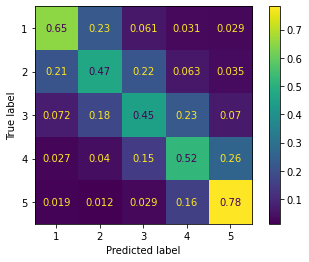

In [ ]:
INPUT_SIZE = len(vocab_unigram)

device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = BOWNet(INPUT_SIZE)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train(model, get_next_batch, vectorizer)
torch.save(model.state_dict(), PATH)

### 2nd model - two-grams

We use the same techniques to create a CountVectorizer on the training corpus, but this time we use n- grams (specifically 2 grams) to capture more meaning from the text

In [12]:
vocab_bigram = create_new_vocab(unigram_counter, bigram_counter, threshold=10)

Size of combined vocab before threshold: 12042715
Size of combined vocab after threshold: 133354


In [ ]:
print("Vocabulary length: ", len(vocab_bigram))

Vocabulary length:  133354


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), vocabulary=vocab_bigram)

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/BOWNetBI_new'

  0%|          | 0/6250 [00:00<?, ?it/s]


Epoch no:  1

Training the model...



  0%|          | 0/6250 [00:00<?, ?it/s]


Evaluating the model on the training set...



  0%|          | 0/1562 [00:00<?, ?it/s]

Evaluating the model on the test set...



  0%|          | 0/6250 [00:00<?, ?it/s]


Epoch: 1 | Loss: 1.0179 | Train Accuracy: 66.99 | Test Accuracy: 58.98 | F1 Macro score: 0.58 | F1 Micro score: 0.59 | F1 Weighted score: 0.58


Epoch no:  2

Training the model...



  0%|          | 0/6250 [00:00<?, ?it/s]


Evaluating the model on the training set...



  0%|          | 0/1562 [00:00<?, ?it/s]

Evaluating the model on the test set...



100%|██████████| 1562/1562 [05:57<00:00,  4.37it/s]



Epoch: 2 | Loss: 0.8009 | Train Accuracy: 76.75 | Test Accuracy: 58.94 | F1 Macro score: 0.59 | F1 Micro score: 0.59 | F1 Weighted score: 0.59



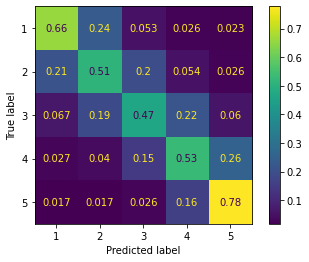

In [ ]:
INPUT_SIZE = len(vocab_bigram)

device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = BOWNet(INPUT_SIZE)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train(model, get_next_batch, vectorizer)
torch.save(model.state_dict(), PATH)

### 3rd Model - tri-grams

In [ ]:
vocab_trigram = create_new_vocab(unigram_counter, bigram_counter, trigram_counter, threshold=10)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,3), vocabulary=vocab_trigram)

In [ ]:
INPUT_SIZE = len(vocab_trigram)

device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = BOWNet(INPUT_SIZE)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train(model, get_next_batch, vectorizer)
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/BOWNetTRI')

#**WORD2VEC**

##Loading pretrained W2V representention

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader

w2v_model = gensim.downloader.load('glove-twitter-200')

[===============================================---] 94.6% 717.5/758.5MB downloaded


##Vocabulary and Weights for the Embedding Layer

In [ ]:
import torch
word2index = {} # 0 is reserved for unknown mappings
index2word = {}
count_vocab_size = 0
for i, (word, vocab_obj) in enumerate(w2v_model.vocab.items()):
  count_vocab_size += 1

weights = torch.zeros(count_vocab_size + 1, 200)

for i, (word, vocab_obj) in enumerate(w2v_model.vocab.items()):
  word2index[word] = i + 1
  index2word[i + 1] = word
  weights[i + 1] = torch.tensor(w2v_model[word])



##Loading Clean and Balanced Data


In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
import torch
import pickle
import html
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from collections import Counter

device = torch.device("cuda:0")
nltk.download('stopwords')
nltk.download('punkt')

MAX_REVIEW_LENGTH = 200
DATA_PATH_TRAIN = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Train.json"
DATA_PATH_TEST = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Test.json"

ratings_count = {1:0, 2:0, 3:0, 4:0, 5:0}


review_length_to_count = Counter()


def load_data(data_path):
    f_read = open(data_path, "r")
    X = []
    Y = []
    for i, line in enumerate(tqdm(f_read)):
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            review_text_cleaned = review_json['reviewText'].split()
            indexed_review = [0 for i in range(MAX_REVIEW_LENGTH)]
            if len(review_text_cleaned) > 0:
              if len(review_text_cleaned) < 500:
                review_length_to_count[len(review_text_cleaned)] = review_length_to_count.get(len(review_text_cleaned),0) + 1
              for i in range(min(len(review_text_cleaned),MAX_REVIEW_LENGTH)):
                if review_text_cleaned[i] in w2v_model:
                  indexed_review[MAX_REVIEW_LENGTH - min(len(review_text_cleaned),MAX_REVIEW_LENGTH) + i] = word2index[review_text_cleaned[i]]
                else:
                  indexed_review[MAX_REVIEW_LENGTH - min(len(review_text_cleaned),MAX_REVIEW_LENGTH) + i] = word2index['unk']
              X.append(indexed_review)
              Y.append(int(review_json['overall']) - 1)
              ratings_count[int(review_json['overall'])] += 1
    return torch.tensor(X, dtype=torch.long).to(device), torch.tensor(Y, dtype=torch.int64).to(device)
  
X_train, Y_train = load_data(DATA_PATH_TRAIN)
X_test, Y_test = load_data(DATA_PATH_TEST)
print("Example of a training sample: ", X_train[1])
print("With label: ", Y_train[1]+1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...


3388it [00:00, 16735.39it/s]

[nltk_data]   Package punkt is already up-to-date!


1600000it [01:48, 14683.14it/s]
400000it [00:25, 15907.73it/s]


Example of a training sample:  tensor([     0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,     11,     65,    249,
            12,    831,     40, 580731,  18158,    138,    321,    766, 120090,
          5092,     71,     75,     34,    216,    250,    591,     47,     34,
         

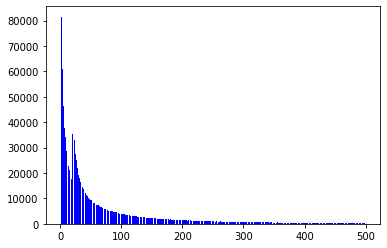

In [ ]:
import matplotlib.pyplot as plt

plt.bar(list(review_length_to_count.keys()), review_length_to_count.values(), color='b')
plt.show()


##Configure Data Loader

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

BATCH_SIZE = 128

train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=None)

test_dataset = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=None)

##Model Selection

###NAIVE

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

WORD_DIM = 200

class W2VNet(nn.Module):
  def __init__(self):
    super(W2VNet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = True)
    self.layer1 = nn.Linear(MAX_REVIEW_LENGTH*WORD_DIM, 256)
    self.layer2 = nn.Linear(256,128)
    self.layer3 = nn.Linear(128,64)
    self.layer4 = nn.Linear(64,5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    output = F.relu(self.layer1(embedded_input.view(embedded_input.shape[0], MAX_REVIEW_LENGTH*WORD_DIM)))
    output = F.relu(self.layer2(output))
    output = F.relu(self.layer3(output))
    output = self.layer4(output)
    return output


###RNN

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

WORD_DIM = 200

class W2VRNNNet(nn.Module):
  def __init__(self):
    super(W2VRNNNet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = True)
    self.layer1 = nn.RNN(WORD_DIM, 512, 2, batch_first = True)
    self.layer2 = nn.Linear(MAX_REVIEW_LENGTH * 512, 5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2, embedded_input.shape[0], 512).to(device)
    out, _ = self.layer1(embedded_input, h0)
    out = out.reshape(embedded_input.shape[0], -1)
    out = self.layer2(out) 
    return out

###GRU

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

WORD_DIM = 200
HIDDEN_DIM = 512

class W2VGRUNet(nn.Module):
  def __init__(self):
    super(W2VGRUNet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = True)
    self.layer1 = nn.GRU(WORD_DIM, HIDDEN_DIM, 2, batch_first = True, dropout = 0.2)
    self.layer2 = nn.Linear(MAX_REVIEW_LENGTH * HIDDEN_DIM, 5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    out, _ = self.layer1(embedded_input, h0)
    out = out.reshape(embedded_input.shape[0], -1)
    out = self.layer2(out)
    return out

###LSTM

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

WORD_DIM = 200
HIDDEN_DIM = 512


class W2VLSTMNet(nn.Module):
  def __init__(self):
    super(W2VLSTMNet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = True)
    self.layer1 = nn.LSTM(WORD_DIM, HIDDEN_DIM, 2, batch_first = True, dropout = 0.2)
    self.layer2 = nn.Linear(HIDDEN_DIM, 5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    c0 = torch.zeros(2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    out, _ = self.layer1(embedded_input, (h0,c0))
    out = out[:, -1, :]
    out = self.layer2(out)
    return out

###BLSTM

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

weights.to(device)
HIDDEN_DIM = 512

class W2VBILSTMNet(nn.Module):
  def __init__(self):
    super(W2VBILSTMNet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = True)
    self.layer1 = nn.LSTM(200, HIDDEN_DIM, 2, batch_first = True, bidirectional = True, dropout = 0.2)
    #add dropout
    self.layer2 = nn.Linear(HIDDEN_DIM * 2, 5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    c0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    out, _ = self.layer1(embedded_input, (h0,c0))
    out = out[:, -1, :]
    out = self.layer2(out)
    return out

###BLSTM Fine-Tuned

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

weights.to(device)
HIDDEN_DIM = 512

class W2VBILSTMTUNENet(nn.Module):
  def __init__(self):
    super(W2VBILSTMTUNENet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = False)
    self.layer1 = nn.LSTM(200, HIDDEN_DIM, 2, batch_first = True, bidirectional = True, dropout = 0.2)
    #add dropout
    self.layer2 = nn.Linear(HIDDEN_DIM * 2, 5)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    c0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    out, _ = self.layer1(embedded_input, (h0,c0))
    out = out[:, -1, :]
    out = self.layer2(out)
    return out

## Training Function Initialization

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


LEARNING_RATE = 0.001
NUM_EPOCHS = 2

unk_set = set()


def get_accuracy(output, target, batch_size):
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


def evaluate(X, Y, loader, mod, is_test, batch_size = BATCH_SIZE):
  with torch.no_grad():
    accuracy = 0
    if is_test:
      predictions = np.zeros(len(X))
      for batch_ndx, sample in enumerate(tqdm(loader)):
        input, targets = input, targets = sample[0], sample[1]
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)
        preds = torch.argmax(out, dim = 1)
        for pred_index in range(len(preds)):
          predictions[pred_index + (batch_ndx*batch_size)] = preds[pred_index]

      Y_array = Y.cpu().detach().numpy()
      f1_micro = f1_score(Y_array,predictions, average='micro')
      accuracy = accuracy/int(len(X)/batch_size)
      cm = confusion_matrix(Y_array, predictions, normalize='true')
      plt.show()
      return accuracy, f1_micro, cm
    else:
      for batch_ndx, sample in enumerate(tqdm(loader)):
        input, targets = sample[0], sample[1]
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)
      accuracy = accuracy/int(len(X)/batch_size)
      return accuracy

    
def get_next_batch(X, Y, batch_size, index):
  X_batch = X[(index*batch_size):(index*batch_size + batch_size)].to(device)
  Y_batch = Y[(index*batch_size):(index*batch_size + batch_size)].to(device)
  return X_batch, Y_batch


def train_w2v(mod, num_epochs = NUM_EPOCHS, batch_size = BATCH_SIZE):

  for epoch in range(num_epochs):
      print()
      print(f'epoch {epoch}:')
      print()
      train_running_loss = 0.0
      train_acc = 0.0
      test_acc = 0.0

      mod = mod.train()
      print()
      print("training...")
      print()
      for batch_ndx, sample in enumerate(tqdm(train_loader)):
          input, targets = sample[0], sample[1]
          out = mod(input)
          loss = criterion(out, targets)
          optimizer.zero_grad()
          loss.backward()

          optimizer.step()

          train_running_loss += loss.detach().item()
      
      print("evaluating on trainings set...")
      train_acc = evaluate(X_train, Y_train, train_loader, mod, False,  batch_size)

      print("evaluating on test set...")
      test_acc, test_f1, cm = evaluate(X_test, Y_test, test_loader, mod, True, batch_size)
           
  
      print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f | Test Accuracy: %.2f | F1 score: %.2f' \
            %(epoch+1, train_running_loss / int(len(X_train)/batch_size), train_acc, test_acc, test_f1))
      
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
  disp.plot()

##Training and Evaluation

###NAIVE

  0%|          | 11/12500 [00:00<02:00, 103.56it/s]


epoch 0:


training...



  0%|          | 53/12500 [00:00<00:23, 528.96it/s]

evaluating on trainings set...


  1%|          | 28/3125 [00:00<00:11, 278.43it/s]

evaluating on test set...


  0%|          | 12/12500 [00:00<01:52, 111.33it/s]

Epoch: 1 | Loss: 1.1879 | Train Accuracy: 51.78 | Test Accuracy: 49.34 | F1 score: 0.50

epoch 1:


training...



  0%|          | 51/12500 [00:00<00:24, 500.56it/s]

evaluating on trainings set...


  1%|          | 29/3125 [00:00<00:10, 287.80it/s]

evaluating on test set...


100%|██████████| 3125/3125 [00:11<00:00, 278.99it/s]


Epoch: 2 | Loss: 1.0923 | Train Accuracy: 55.12 | Test Accuracy: 49.66 | F1 score: 0.50


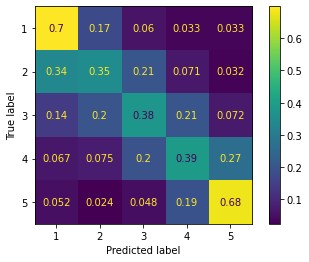

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VNet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VNet')

###RNN

  0%|          | 1/12500 [00:00<20:59,  9.92it/s]


epoch 0:


training...



  0%|          | 5/12500 [00:00<04:36, 45.16it/s]

evaluating on trainings set...


  0%|          | 5/3125 [00:00<01:11, 43.91it/s]

evaluating on test set...


  0%|          | 2/12500 [00:00<11:00, 18.93it/s]

Epoch: 1 | Loss: 1.4021 | Train Accuracy: 44.99 | Test Accuracy: 44.81 | F1 score: 0.45

epoch 1:


training...



  0%|          | 5/12500 [00:00<04:17, 48.43it/s]

evaluating on trainings set...


  0%|          | 5/3125 [00:00<01:10, 44.53it/s]

evaluating on test set...


100%|██████████| 3125/3125 [01:10<00:00, 44.35it/s]


Epoch: 2 | Loss: 14.5606 | Train Accuracy: 20.15 | Test Accuracy: 20.29 | F1 score: 0.21


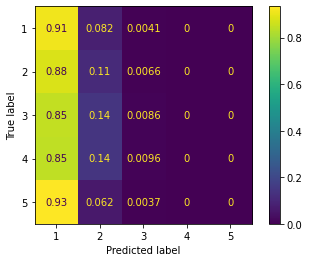

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VRNNNet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VRNNNet')

###GRU


  0%|          | 0/12500 [00:00<?, ?it/s]

3184645

epoch 0:


training...



  0%|          | 2/12500 [00:00<10:31, 19.79it/s]

evaluating on trainings set...


  0%|          | 2/3125 [00:00<02:37, 19.86it/s]

evaluating on test set...


  0%|          | 1/12500 [00:00<28:42,  7.25it/s]

Epoch: 1 | Loss: 1.0278 | Train Accuracy: 59.31 | Test Accuracy: 58.38 | F1 score: 0.58

epoch 1:


training...



  0%|          | 2/12500 [00:00<10:27, 19.93it/s]

evaluating on trainings set...


  0%|          | 2/3125 [00:00<02:36, 19.91it/s]

evaluating on test set...


100%|██████████| 3125/3125 [02:40<00:00, 19.42it/s]


Epoch: 2 | Loss: 0.9318 | Train Accuracy: 61.83 | Test Accuracy: 59.58 | F1 score: 0.60


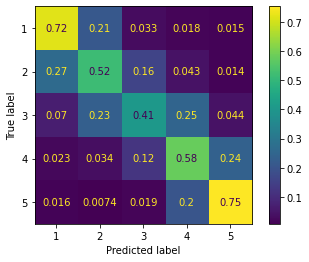

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VGRUNet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VGRUNet')

###LSTM



  0%|          | 0/12500 [00:00<?, ?it/s]

3566085

epoch 0:


training...



  0%|          | 2/12500 [00:00<14:27, 14.40it/s]

evaluating on trainings set...


  0%|          | 2/3125 [00:00<03:45, 13.85it/s]

evaluating on test set...


  0%|          | 0/12500 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.9937 | Train Accuracy: 60.96 | Test Accuracy: 60.11 | F1 score: 0.60

epoch 1:


training...



  0%|          | 2/12500 [00:00<14:25, 14.44it/s]

evaluating on trainings set...


  0%|          | 2/3125 [00:00<03:39, 14.21it/s]

evaluating on test set...


100%|██████████| 3125/3125 [03:44<00:00, 13.92it/s]


Epoch: 2 | Loss: 0.8980 | Train Accuracy: 63.20 | Test Accuracy: 61.02 | F1 score: 0.61


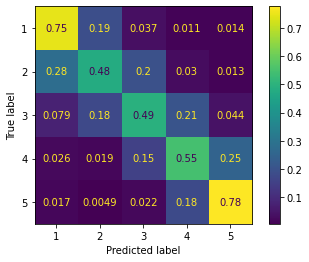

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VLSTMNet()
model = model.to(device)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_w2v(model)
# torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VLSTMNet')

###BLSTM

  0%|          | 0/12500 [00:00<?, ?it/s]

9229317

epoch 0:


training...



  0%|          | 1/12500 [00:00<35:43,  5.83it/s]

evaluating on trainings set...


  0%|          | 1/3125 [00:00<09:13,  5.64it/s]

evaluating on test set...


  0%|          | 0/12500 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.9922 | Train Accuracy: 61.31 | Test Accuracy: 60.35 | F1 score: 0.60

epoch 1:


training...



  0%|          | 1/12500 [00:00<36:04,  5.78it/s]

evaluating on trainings set...


  0%|          | 1/3125 [00:00<08:56,  5.82it/s]

evaluating on test set...


100%|██████████| 3125/3125 [09:05<00:00,  5.73it/s]


Epoch: 2 | Loss: 0.8884 | Train Accuracy: 63.88 | Test Accuracy: 61.36 | F1 score: 0.61


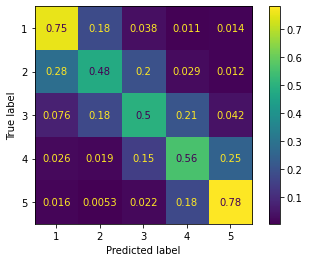

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VBILSTMNet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VBILSTMNet')

###BLSTM Fine-Tuned

  0%|          | 0/12500 [00:00<?, ?it/s]

247932317

epoch 0:


training...



  0%|          | 1/12500 [00:00<33:00,  6.31it/s]

evaluating on trainings set...


  0%|          | 1/3125 [00:00<08:26,  6.17it/s]

evaluating on test set...


  0%|          | 0/12500 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.9608 | Train Accuracy: 63.17 | Test Accuracy: 61.23 | F1 score: 0.61

epoch 1:


training...



  0%|          | 1/12500 [00:00<33:03,  6.30it/s]

evaluating on trainings set...


  0%|          | 1/3125 [00:00<08:18,  6.27it/s]

evaluating on test set...


100%|██████████| 3125/3125 [08:39<00:00,  6.02it/s]


Epoch: 2 | Loss: 0.8532 | Train Accuracy: 67.04 | Test Accuracy: 62.04 | F1 score: 0.62


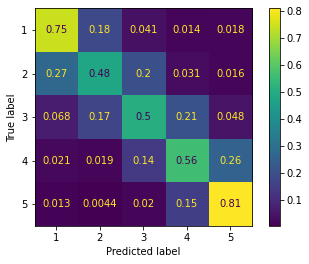

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VBILSTMTUNENet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VBILSTMTUNENet')

# Binary classification

We take our best model (The LSTM) and evaluate the performance on a similar task.
Reviews that were labeled 1-2 are now labeled 0 (negative)
Reviews that were labeled 4-5 are now labeled 1 (positive)

Reviews that were labeled as 3 are discarded

## Load binary clean balanced data

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
import torch
import pickle
import html
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from collections import Counter

device = torch.device("cuda:0")
nltk.download('stopwords')
nltk.download('punkt')

MAX_REVIEW_LENGTH = 200
DATA_PATH_TRAIN = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Train.json"
DATA_PATH_TEST = "/content/drive/MyDrive/Colab Notebooks/Movies_and_TV_Balanced_400k_Clean_With_Stops_Test.json"

ratings_count = {1:0, 2:0, 3:0, 4:0, 5:0}


review_length_to_count = Counter()


def load_data(data_path):
    f_read = open(data_path, "r")
    X = []
    Y = []
    for i, line in enumerate(tqdm(f_read)):
        review_json = json.loads(line)
        if 'reviewText' in review_json:
            review_text_cleaned = review_json['reviewText'].split()
            indexed_review = [0 for i in range(MAX_REVIEW_LENGTH)]
            if len(review_text_cleaned) > 0:
              if len(review_text_cleaned) < 500:
                review_length_to_count[len(review_text_cleaned)] = review_length_to_count.get(len(review_text_cleaned),0) + 1
              for i in range(min(len(review_text_cleaned),MAX_REVIEW_LENGTH)):
                if review_text_cleaned[i] in w2v_model:
                  indexed_review[MAX_REVIEW_LENGTH - min(len(review_text_cleaned),MAX_REVIEW_LENGTH) + i] = word2index[review_text_cleaned[i]]
                else:
                  indexed_review[MAX_REVIEW_LENGTH - min(len(review_text_cleaned),MAX_REVIEW_LENGTH) + i] = word2index['unk']
              rating = int(review_json['overall'])
              if rating != 3:
                X.append(indexed_review)
                if rating >= 4:
                  Y.append(1)
                else:
                  Y.append(0)
              ratings_count[int(review_json['overall'])] += 1
    return torch.tensor(X, dtype=torch.long).to(device), torch.tensor(Y, dtype=torch.int64).to(device)
  
X_train, Y_train = load_data(DATA_PATH_TRAIN)
X_test, Y_test = load_data(DATA_PATH_TEST)
print("Example of a training sample: ", X_train[1])
print("With label: ", Y_train[1]+1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1600000it [02:19, 11440.68it/s]
400000it [00:33, 12101.49it/s]


Example of a training sample:  tensor([     0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,     11,     65,    249,
            12,    831,     40, 580731,  18158,    138,    321,    766, 120090,
          5092,     71,     75,     34,    216,    250,    591,     47,     34,
         

## Configure Data Loader

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

BATCH_SIZE = 128

train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=None)

test_dataset = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=None)

## BLSTM Binary

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import json
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

weights.to(device)
HIDDEN_DIM = 512

class W2VBILSTMTUNENet(nn.Module):
  def __init__(self):
    super(W2VBILSTMTUNENet, self).__init__()
    self.embedding = nn.Embedding.from_pretrained(weights, freeze = False)
    self.layer1 = nn.LSTM(200, HIDDEN_DIM, 2, batch_first = True, bidirectional = True, dropout = 0.2)
    #add dropout
    self.layer2 = nn.Linear(HIDDEN_DIM * 2, 2)
    
  def forward(self, input):
    embedded_input = self.embedding(input).to(device)
    h0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    c0 = torch.zeros(2 * 2, embedded_input.shape[0], HIDDEN_DIM).to(device)
    out, _ = self.layer1(embedded_input, (h0,c0))
    out = out[:, -1, :]
    out = self.layer2(out)
    return out

## Training and evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


LEARNING_RATE = 0.001
NUM_EPOCHS = 2

unk_set = set()


def get_accuracy(output, target, batch_size):
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


def evaluate(X, Y, loader, mod, is_test, batch_size = BATCH_SIZE):
  with torch.no_grad():
    accuracy = 0
    if is_test:
      predictions = np.zeros(len(X))
      for batch_ndx, sample in enumerate(tqdm(loader)):
        input, targets = input, targets = sample[0], sample[1]
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)
        preds = torch.argmax(out, dim = 1)
        for pred_index in range(len(preds)):
          predictions[pred_index + (batch_ndx*batch_size)] = preds[pred_index]

      Y_array = Y.cpu().detach().numpy()
      f1_micro = f1_score(Y_array,predictions, average='micro')
      accuracy = accuracy/int(len(X)/batch_size)
      cm = confusion_matrix(Y_array, predictions, normalize='true')
      plt.show()
      return accuracy, f1_micro, cm
    else:
      for batch_ndx, sample in enumerate(tqdm(loader)):
        input, targets = sample[0], sample[1]
        out = mod(input)
        accuracy += get_accuracy(out, targets, batch_size)
      accuracy = accuracy/int(len(X)/batch_size)
      return accuracy

    
def get_next_batch(X, Y, batch_size, index):
  X_batch = X[(index*batch_size):(index*batch_size + batch_size)].to(device)
  Y_batch = Y[(index*batch_size):(index*batch_size + batch_size)].to(device)
  return X_batch, Y_batch


def train_w2v(mod, num_epochs = NUM_EPOCHS, batch_size = BATCH_SIZE):

  for epoch in range(num_epochs):
      print()
      print(f'epoch {epoch}:')
      print()
      train_running_loss = 0.0
      train_acc = 0.0
      test_acc = 0.0

      mod = mod.train()
      print()
      print("training...")
      print()
      for batch_ndx, sample in enumerate(tqdm(train_loader)):
          input, targets = sample[0], sample[1]
          out = mod(input)
          loss = criterion(out, targets)
          optimizer.zero_grad()
          loss.backward()

          optimizer.step()

          train_running_loss += loss.detach().item()
      
      print("evaluating on trainings set...")
      train_acc = evaluate(X_train, Y_train, train_loader, mod, False,  batch_size)

      print("evaluating on test set...")
      test_acc, test_f1, cm = evaluate(X_test, Y_test, test_loader, mod, True, batch_size)
           
  
      print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f | Test Accuracy: %.2f | F1 score: %.2f' \
            %(epoch+1, train_running_loss / int(len(X_train)/batch_size), train_acc, test_acc, test_f1))
      
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2])
  disp.plot()

  0%|          | 0/10000 [00:00<?, ?it/s]

247929242

epoch 0:


training...



  0%|          | 0/10000 [00:00<?, ?it/s]

evaluating on trainings set...


  0%|          | 0/2501 [00:00<?, ?it/s]

evaluating on test set...


  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.2062 | Train Accuracy: 94.48 | Test Accuracy: 93.46 | F1 score: 0.93

epoch 1:


training...



  0%|          | 0/10000 [00:00<?, ?it/s]

evaluating on trainings set...


  0%|          | 0/2501 [00:00<?, ?it/s]

evaluating on test set...


100%|██████████| 2501/2501 [11:46<00:00,  3.54it/s]


Epoch: 2 | Loss: 0.1461 | Train Accuracy: 96.00 | Test Accuracy: 93.74 | F1 score: 0.94


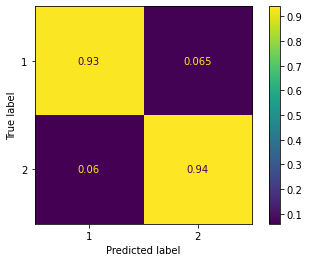

In [ ]:
train_accuracies = []
test_accuracies = []
unk_set = set()
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VBILSTMTUNENet()
model = model.to(device)
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_w2v(model)
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/W2VBLSTM_Binary_Net')

#Error Analysis

In [10]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

LEARNING_RATE = 0.001
NUM_EPOCHS = 2
BATCH_SIZE = 256

def get_next_batch(X, Y, batch_size, index, vect):
  review_batch = X[index*batch_size : index*batch_size + batch_size]
  label_batch = Y[index*batch_size : index*batch_size + batch_size]
  X_transformed = vectorizer.fit_transform(review_batch)
  X_batch = torch.as_tensor(X_transformed.toarray(),dtype = torch.float32 ).cuda()
  Y_batch = torch.as_tensor(label_batch, dtype=torch.int64).cuda()
  return X_batch, Y_batch


def evaluate(X, Y, mod, vect, get_batch_func, is_test, batch_size = BATCH_SIZE):
  with torch.no_grad():
    accuracy = 0
    predictions = np.zeros(int(len(X)/batch_size) * batch_size)
    labels = Y[:int(len(X)/batch_size) * batch_size]
    if is_test:
        input, targets = get_batch_func(X, Y, batch_size, 0, vect)
        out = mod(input)
        preds = torch.argmax(out, dim = 1)
        for k in range(100):
          if preds[k] != targets[k]:
            print(f'review: {X[k]}')
            print(f'predicted label: {preds[k] + 1}')
            print(f'real label: {targets[k] + 1}')
            print("")

##BOW - uni

In [11]:
PATH = '/content/drive/MyDrive/Colab Notebooks/BOWNet_Unigram_new'

INPUT_SIZE = len(vocab_unigram)
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = BOWNet(INPUT_SIZE)
model = model.to(device)
model.load_state_dict(torch.load(PATH))
model.eval()
evaluate(X_test, Y_test, model, vectorizer,  get_next_batch, True, batch_size = BATCH_SIZE)

review: best cartoon series ever done favorite super hero watched ones shame last long accurate description comic book spider man neither cartoons movies matter really go back early days peter parker would early 60 see would like took place early 21st century serious tone comics movies aimed young children either
predicted label: 3
real label: 4

review: film : 5 stars wonderful warm witty simply enjoyable movie love dvd : 1 star bought dvd without reading reviews also bought talk town day date columbia release columbia past done astounding work restoring remastering old films happened one night classics collection nothing short amazing transfer apparently agenda changed : content simply release anything long tout high definition remaster thus tricking customers thinking money time actually spent striking new print talk town look sound absolutely horrible vhs version film less grain fewer sound defects hissing popping abound fact transfer akin quality one often see network television a

##BOW - bi

In [14]:
PATH = '/content/drive/MyDrive/Colab Notebooks/BOWNetBI_new'

INPUT_SIZE = len(vocab_bigram)
device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = BOWNet(INPUT_SIZE)
model = model.to(device)
model.load_state_dict(torch.load(PATH))
model.eval()
evaluate(X_test, Y_test, model, vectorizer,  get_next_batch, True, batch_size = BATCH_SIZE)

review: based true story wrongful conviction imprisonment chicago man freed eleven years combined efforts mother local newspaper man
predicted label: 5
real label: 4

review: gave rocky horror picture show second chance still liked much like writing movie reviews know big deal movie people watch boring fall hype anymore
predicted label: 1
real label: 2

review: film : 5 stars wonderful warm witty simply enjoyable movie love dvd : 1 star bought dvd without reading reviews also bought talk town day date columbia release columbia past done astounding work restoring remastering old films happened one night classics collection nothing short amazing transfer apparently agenda changed : content simply release anything long tout high definition remaster thus tricking customers thinking money time actually spent striking new print talk town look sound absolutely horrible vhs version film less grain fewer sound defects hissing popping abound fact transfer akin quality one often see network telev

In [ ]:
def get_label_of_review(review, vect, mod):
  X_transformed = vectorizer.fit_transform([review])
  X_transformed = torch.as_tensor(X_transformed.toarray(),dtype = torch.float32 ).cuda()
  out = model(X_transformed)
  pred = torch.argmax(out, dim = 1)
  return pred.item()+1

uni_mistake = "well acted movie awful time history"

get_label_of_review(uni_mistake, vectorizer, model)

4

## BLSTM - Fine Tuned

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def translate_review(review):
  translated_review = []
  start_index = 0
  while review[start_index] == 0:
    start_index += 1
  for i in range(start_index, len(review)):
    translated_review.append(index2word[review[i].item()])
  return translated_review

def evaluate(X, Y, loader, mod, is_test, batch_size = BATCH_SIZE):
  with torch.no_grad():
    accuracy = 0
    if is_test:
      for i, sample in enumerate(loader):
        if i > 4:
          break
        input, targets = input, targets = sample[0], sample[1]
        out = mod(input)
        preds = torch.argmax(out, dim = 1)
        for k in range(len(preds)):
          if preds[k] != targets[k]:
            print(f'review: {translate_review(X[k + (i*batch_size)])}')
            print(f'predicted label: {preds[k] + 1}')
            print(f'real label: {targets[k] + 1}')
            print("")
    



In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/W2VBILSTMTUNENet'

device = torch.device("cuda:0")
criterion = nn.CrossEntropyLoss()
model = W2VBILSTMTUNENet()
model = model.to(device)
model.load_state_dict(torch.load(PATH))
model.eval()
evaluate(X_test, Y_test, test_loader, model, True, BATCH_SIZE)

review: ['i', 'have', 'to', 'agree', 'with', 'most', 'of', 'the', 'other', 's', 'users', 'comments', 'it', 'was', 'a', 'bit', 'confusing', 'and', 'it', 'helped', 'reading', 'their', 'comments', 'i', 'personally', 'as', 'you', 'can', 'see', 'from', 'what', 'i', 'usually', 'buy', 'dramas', 'cerebral', 'movies', 'was', 'kind', 'of', 'lost', 'with', 'this', 'one', 'i', 'know', 'this', 'isn', 't', 'much', 'of', 'a', 'review', 'but', 'it', 'was', 'great', 'seeing', 'a', 'very', 'young', 'tommy', 'lee', 'jones', 'i', 'know', 'this', 'doesn', 't', 'have', 'anything', 'to', 'do', 'with', 'this', 'movie', 'but', 'for', 'fantasy', 'i', 'really', 'enjoyed', 'unk', 'which', 'was', 'actually', 'a', 'children', 's', 'book', 'and', 'then', 'movie', 'the', 'actor', 'who', 'portrayed', 'unk', 'tim', 'roth', 'was', 'excellent', 'eliza', 's', 'horoscope', 'has', 'to', 'do', 'with', 'indian', 'culture', 'mysticism', 'which', 'i', 'usually', 'enjoy', 'and', 'death', 'all', 'in', 'all', 'i', 'was', 'a', 'bit